In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt

In [2]:
# --- 2. Load dataset ---
df = pd.read_csv("labeled_cbc_new.csv")
print("✅ Dataset loaded successfully! Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully! Shape: (500, 29)
   ID      WBC  LYMp  MIDp  NEUTp  LYMn  MIDn  NEUTn   RBC  HGB  ...   PCT  \
0   1  10000.0  43.2   6.7   50.1   4.3   0.7    5.0  2.77  7.3  ...  0.17   
1   2  10000.0  42.4   5.3   52.3   4.2   0.5    5.3  2.84  7.3  ...  0.16   
2   3   7200.0  30.7   8.6   60.7   2.2   0.6    4.4  3.97  9.0  ...  0.14   
3   4   6000.0  30.2   6.3   63.5   1.8   0.4    3.8  4.22  3.8  ...  0.12   
4   5   4200.0  39.1   7.2   53.7   1.6   0.3    2.3  3.93  0.4  ...  0.22   

   PLCR  WBC_raw_units  PLT_raw_units   flag_hgb  flag_wbc  flag_plt  \
0  22.3      thousands      thousands     Urgent    Normal    Normal   
1  19.5      thousands      thousands     Urgent    Normal    Normal   
2  30.5      thousands      thousands       Mild    Normal      Mild   
3  16.4      thousands      thousands  Emergency    Normal      Mild   
4  24.8      thousands      thousands  Emergency    Normal    Normal   

   flag_rbc  flag_hct  Urgency_Level  
0      Mild

In [3]:
# --- 3. Select important features and target ---
features = ['HGB','WBC','RBC','PLT','HCT','MCV','MCH','MCHC','RDWSD','RDWCV']
df = df.dropna(subset=['Urgency_Level'])     # drop rows without label
X = df[features]
y = df['Urgency_Level']

In [4]:
# --- 4. Encode labels (Normal → 0, Mild → 1, etc.) ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Classes found:", list(le.classes_))

Classes found: ['Emergency', 'Mild', 'Normal', 'Urgent']


In [5]:
# --- 5. Split data into train/test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print("Train size:", X_train.shape, "| Test size:", X_test.shape)

Train size: (400, 10) | Test size: (100, 10)


In [6]:
# --- 6. Train Random Forest model ---
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
print("\n✅ Model training complete!")


✅ Model training complete!


In [7]:
# --- 7. Evaluate model ---
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc*100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy: 95.00%

📊 Classification Report:
               precision    recall  f1-score   support

   Emergency       0.75      0.60      0.67         5
        Mild       0.98      0.96      0.97        49
      Normal       0.97      1.00      0.98        30
      Urgent       0.88      0.94      0.91        16

    accuracy                           0.95       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.95      0.95      0.95       100


📉 Confusion Matrix:
 [[ 3  1  0  1]
 [ 0 47  1  1]
 [ 0  0 30  0]
 [ 1  0  0 15]]


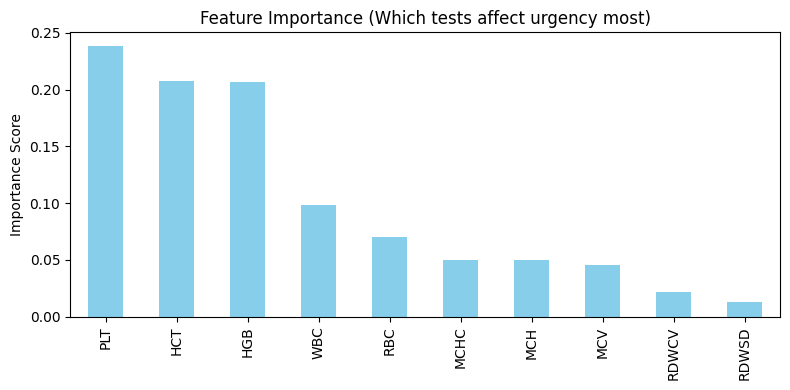

In [8]:
# --- 8. Feature Importance Visualization ---
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,4))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Which tests affect urgency most)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
# --- 9. Save model and encoder ---
joblib.dump(model, "cbc_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("\n💾 Model and encoder saved successfully:")
print("   • cbc_model.pkl")
print("   • label_encoder.pkl")
print("\n🎉 All done! You can now use this model for predictions or web integration.")


💾 Model and encoder saved successfully:
   • cbc_model.pkl
   • label_encoder.pkl

🎉 All done! You can now use this model for predictions or web integration.
